In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Introduction

This notebook is meant to serve as a summary of the data that we may need to deal with during the competition. 

You can download the dataset we used [here](https://www.kaggle.com/datasets/thedrcat/daigt-v2-train-dataset)

In [5]:
# Define file paths
daigt_v2_train_path = '/kaggle/input/exploring-daigt-v2-train-dataset/train_v2_drcat_02.csv'

# Load the data
df = pd.read_csv (daigt_v2_train_path)

In [6]:
df.tail()

,text,label,prompt_name,source,RDizzl3_seven
44863,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44864,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44865,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44866,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44867,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True


In [7]:
df.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   label          44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


In [9]:
df.isnull().sum()


text             0
label            0
prompt_name      0
source           0
RDizzl3_seven    0
dtype: int64

# Exploratory Data Analysis (EDA)

In [10]:
df['prompt_name'].value_counts()


prompt_name
Distance learning                        5554
Seeking multiple opinions                5176
Car-free cities                          4717
Does the electoral college work?         4434
Facial action coding system              3084
Mandatory extracurricular activities     3077
Summer projects                          2701
Driverless cars                          2250
Exploring Venus                          2176
Cell phones at school                    2119
Grades for extracurricular activities    2116
Community service                        2092
"A Cowboy Who Rode the Waves"            1896
The Face on Mars                         1893
Phones and driving                       1583
Name: count, dtype: int64

We know that the following 2 of these prompts are the prompts in the train file.

* Car-free cities
* Does the electoral college work?

In [11]:
df['source'].value_counts()

source
persuade_corpus                       25996
mistral7binstruct_v1                   2421
mistral7binstruct_v2                   2421
chat_gpt_moth                          2421
llama2_chat                            2421
kingki19_palm                          1384
train_essays                           1378
llama_70b_v1                           1172
falcon_180b_v1                         1055
darragh_claude_v6                      1000
darragh_claude_v7                      1000
radek_500                               500
NousResearch/Llama-2-7b-chat-hf         400
mistralai/Mistral-7B-Instruct-v0.1      400
cohere-command                          350
palm-text-bison1                        349
radekgpt4                               200
Name: count, dtype: int64

In [12]:
df['label'].value_counts()

label
0    27371
1    17497
Name: count, dtype: int64

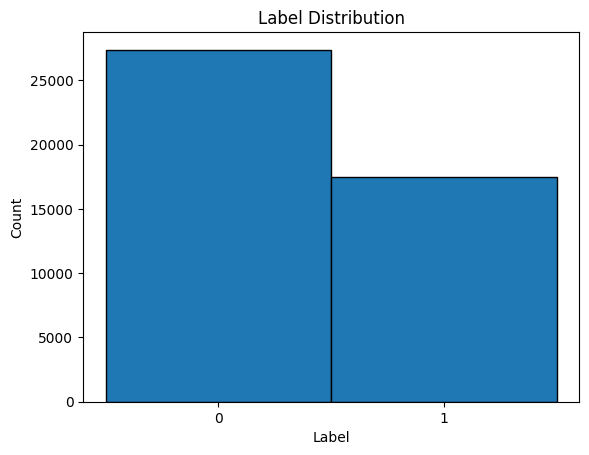

In [6]:
import matplotlib.pyplot as plt

plt.hist(df['label'], bins=[-0.5, 0.5, 1.5], edgecolor='black')  # -0.5, 0.5, 1.5 sınırlarıyla iki bölme kullanıyoruz
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1]) 
plt.show()

**ANALYSIS** 

* 1 for AI generated: 17497
* 0 for human: 27371

In [14]:
fig_hist = px.histogram(
    df,
    x='source',
    title='Source Distribution by Label Category',
    color='label',
    barmode='group',
    color_discrete_sequence=px.colors.qualitative.D3[3:],
)

# Display values on top of the bars
fig_hist.update_traces(
    texttemplate='%{y}',  
    textposition='outside',  
)

fig_hist.show()

In train_essays, we see that 1375 data were generated by students and 3 of them were generated by AI. 
It is seen that all data in persuade_corpus and 1375 data from train_essays are generated by AI, while data from other sources are written by students.

# Text Counts

In [15]:
fig_hist = px.histogram(
    df,
    x='prompt_name',
    title='Prompt Distribution by Label',
    color='label',
    barmode='group',
    color_discrete_sequence=px.colors.qualitative.D3[3:],
)

# Display values on top of the bars
fig_hist.update_traces(
    texttemplate='%{y}',  
    textposition='outside',  
)

fig_hist.show()

Red columns represent texts created by students. (Label 0) Purple columns represent texts generated by AI.(Label 1)

# Text Lengths Analysis

In [16]:
df['Text Length'] = df['text'].str.split().map(lambda x : len(x))

fig = px.histogram(
    df,
    x='Text Length',
    title='Distribution of word count of text',
    color_discrete_sequence=['#e377c2'], 
)

fig.show()

**ANALYSIS**

* The histogram shows that mostly essay has around 200-400 words.
* It also displays some outliers, with few essays exceeding 1200 words.

In [17]:
fig = px.histogram(
    df,
    x='Text Length',
    title='Word Count Distribution Across Label',
    color="label",
    color_discrete_sequence=px.colors.qualitative.Bold,
)

fig.show()

* Purple : by students
* Green : AI generated

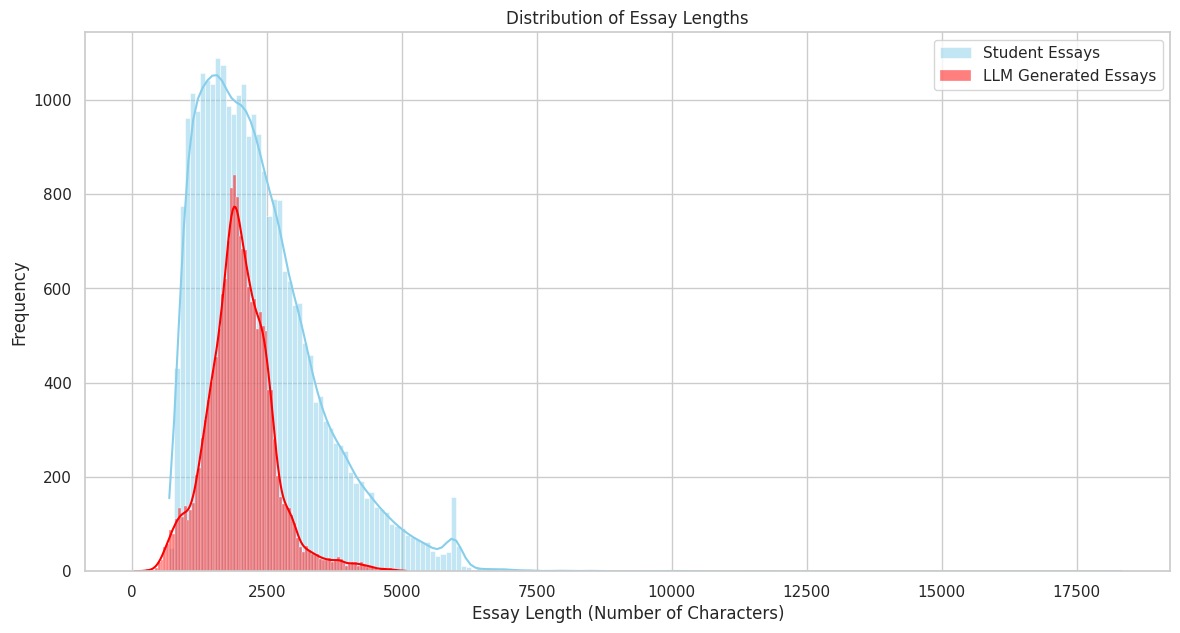

In [18]:
# Calculate the length of each essay and create a new column
df['essay_length'] = df['text'].apply(len)

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Distribution of essay lengths for student essays
sns.histplot(df[df['label'] == 0]['essay_length'], color="skyblue", label='Student Essays', kde=True)

# Distribution of essay lengths for LLM generated essays
sns.histplot(df[df['label'] == 1]['essay_length'], color="red", label='LLM Generated Essays', kde=True)

plt.title('Distribution of Essay Lengths')
plt.xlabel('Essay Length (Number of Characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In terms of character length, there is a density around 1500-2000 characters.

# Average Word Count

In [19]:
import pandas as pd
import plotly.graph_objects as go

df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Prompt adına göre grupla ve ortalama kelime sayısını al
df_grouped = df.groupby(['prompt_name', 'label'], as_index=False)['word_count'].mean()

# Veri setini dönüştür
df_pivot = df_grouped.pivot(index='prompt_name', columns='label', values='word_count').reset_index()

# Görselleştirme
fig = go.Figure()

fig.add_trace(go.Bar(x=df_pivot['prompt_name'], y=df_pivot[1], name='1 for AI generated', marker_color='brown'))
fig.add_trace(go.Bar(x=df_pivot['prompt_name'], y=df_pivot[0], name='0 for student', marker_color='orange'))

fig.update_layout(barmode='group', title='Average Word Count by Prompt',
                  xaxis_title='Prompt Name', yaxis_title='Average Word Count')

fig.show()

**ANALYSIS**
* In the "car-free cities" and "Does the electoral college work?" prompts, the word counts of the texts created by the students are higher. 
* In 4 prompts we see that the texts produced by AI have fewer words, but there is not a big difference between the word counts.
* In the texts written by the students, we see that in some prompts there is a big difference in the number of words.


<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#5642C5;
       font-size:110%;
       font-family:Arial;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">    
ANALİZLER:
        
* "Car-free cities"  ve "Does the electoral college work?" prompt'larında, öğrenciler tarafından oluşturulan metinlerin kelime sayıları daha yüksektir.

* 4 istemde yapay zeka tarafından üretilen metinlerin daha az kelimeye sahip olduğunu görüyoruz, ancak kelime sayıları arasında büyük bir fark yok.

* Öğrenciler tarafından yazılan metinlerde, bazı istemlerde kelime sayısında büyük bir fark olduğunu görüyoruz.      </p>
    
</div>



# Average Character Count

In [20]:
import pandas as pd
import plotly.graph_objects as go

df['word_count'] = df['text'].apply(lambda x: len(x))

# Prompt adına göre grupla ve ortalama kelime sayısını al
df_grouped = df.groupby(['prompt_name', 'label'], as_index=False)['word_count'].mean()

# Veri setini dönüştür
df_pivot = df_grouped.pivot(index='prompt_name', columns='label', values='word_count').reset_index()

# Görselleştirme
fig = go.Figure()

fig.add_trace(go.Bar(x=df_pivot['prompt_name'], y=df_pivot[1], name='1 for AI generated', marker_color='purple'))
fig.add_trace(go.Bar(x=df_pivot['prompt_name'], y=df_pivot[0], name='0 for student', marker_color='orange'))

fig.update_layout(barmode='group', title='Average Character Count by Prompt',
                  xaxis_title='Prompt Name', yaxis_title='Character Word Count')

fig.show()

The character count graph is very similar to the word count graph.


# Average Punctuation Count

In [21]:
import pandas as pd
import plotly.graph_objects as go
import string

df['punctuation_count'] = df['text'].apply(lambda x: sum(1 for char in x if char in string.punctuation))

df_grouped = df.groupby(['prompt_name', 'label'], as_index=False)['punctuation_count'].mean()

df_pivot = df_grouped.pivot(index='prompt_name', columns='label', values='punctuation_count').reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x=df_pivot['prompt_name'], y=df_pivot[1], name='1 for AI generated', marker_color='blue'))
fig.add_trace(go.Bar(x=df_pivot['prompt_name'], y=df_pivot[0], name='0 for student', marker_color='green'))


fig.update_layout(barmode='group', title='Average Punctuation Count by Prompt',
                  xaxis_title='Prompt Name', yaxis_title='Average Punctuation Count')

fig.show()



In terms of some prompts, the use of punctuation marks is higher in the texts created by the students, while in terms of some prompts it is higher in the texts generated by the AI. 

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#5642C5;
       font-size:110%;
       font-family:Arial;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">    
Noktalama işareti kullanımı bazı prompt'lar açısından öğrenciler tarafından oluşturulan metinlerde daha fazlayken, bazı prompt'lar açısından LLM tarafından oluşturulan metinlerde daha fazladır.     </p>
    
</div>



# Average Sentence Length

In [22]:
df['sentence_length'] = df['text'].apply(lambda x: len(x.split('.')))

df_grouped = df.groupby(['prompt_name', 'label'], as_index=False)['sentence_length'].mean()

df_pivot = df_grouped.pivot(index='prompt_name', columns='label', values='sentence_length').reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x=df_pivot['prompt_name'], y=df_pivot[1], name='1 for AI generated', marker_color='red'))
fig.add_trace(go.Bar(x=df_pivot['prompt_name'], y=df_pivot[0], name='0 for student', marker_color='gray'))

fig.update_layout(barmode='group', title='Average Sentence Length by Prompt',
                  xaxis_title='Prompt Name', yaxis_title='Average Sentence Length')

fig.show()

In [23]:
def calculate_text_metrics_simple(text):
    words = text.split()
    sentences = text.split('.')
    word_count = len(words)
    unique_word_count = len(set(words))
    sentence_count = len(sentences)
    avg_word_length = sum(len(word) for word in words) / word_count if word_count > 0 else 0
    return word_count, unique_word_count, sentence_count, avg_word_length

# Apply the function to the 'text' column
df['metrics'] = df['text'].apply(calculate_text_metrics_simple)

# Expand the 'metrics' column into separate columns
df[['word_count', 'unique_word_count', 'sentence_count', 'avg_word_length']] = pd.DataFrame(df['metrics'].tolist(), index=df.index)

# Drop the 'metrics' column as it's no longer needed
df.drop('metrics', axis=1, inplace=True)

# Group by 'generated' to compare these metrics between student-written and LLM-generated essays
comparison_metrics = df.groupby('label')[['word_count', 'unique_word_count', 'sentence_count', 'avg_word_length']].mean()
comparison_metrics

,word_count,unique_word_count,sentence_count,avg_word_length
label,,,,
0,418.283146,199.858646,21.651748,4.531510
1,329.398983,169.369092,18.198891,5.093551


<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#5642C5;
       font-size:110%;
       font-family:Arial;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">    
Metindeki kelime sayısı, benzersiz kelime sayısı, cümle sayısı LLM tarafından oluşturulan metinlerde daha azdır. Metindeki kelime uzunluğunun ortalaması ise daha fazladır.
    </p>
    
</div>



# Most Common Words

In [24]:
def common_words(data, n=20):
    vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
    word_matrix = vectorizer.fit_transform(data['text'])
    word_freq = pd.DataFrame(word_matrix.sum(axis=0), columns=vectorizer.get_feature_names_out())
    common_words = word_freq.transpose().sort_values(by=0, ascending=False).head(n)
    return common_words


In [25]:
import pandas as pd
import plotly.express as px
from collections import Counter

student_data = df[df['label'] == 0]
llm_data = df[df['label'] == 1]

student_word_counts = Counter(' '.join(student_data['text']).split())
llm_word_counts = Counter(' '.join(llm_data['text']).split())

top_student_words = dict(student_word_counts.most_common(20))
top_llm_words = dict(llm_word_counts.most_common(20))

fig = px.bar(x=list(top_student_words.keys()) + list(top_llm_words.keys()),
             y=list(top_student_words.values()) + list(top_llm_words.values()),
             color=['Student'] * 20 + ['LLM'] * 20,
             labels={'x': 'Word', 'y': 'Count', 'color': 'Source'},
             title='Top 20 Words in Student and LLM Articles',
             )

fig.show()


* We can say that the words here are used more by students.
* The words "I", "their", "more", "with" are used more by AI.

# Unique Words

In [26]:
import pandas as pd
import plotly.express as px
from collections import Counter

df['text'] = df['text'].str.replace('[^a-zA-Z]', ' ', regex=True)

student_data = df[df['label'] == 0]
llm_data = df[df['label'] == 1]

student_unique_words = set(' '.join(student_data['text']).split())
llm_unique_words = set(' '.join(llm_data['text']).split())

top_student_words = dict(Counter(student_unique_words).most_common(20))
top_llm_words = dict(Counter(llm_unique_words).most_common(20))

fig = px.bar(x=list(top_student_words.keys()) + list(top_llm_words.keys()),
             y=list(top_student_words.values()) + list(top_llm_words.values()),
             color=['Student'] * 20 + ['LLM'] * 20,
             labels={'x': 'Word', 'y': 'Count', 'color': 'Source'},
             title='Top 20 Unique Words in Student and LLM Articles',
             )

fig.show()


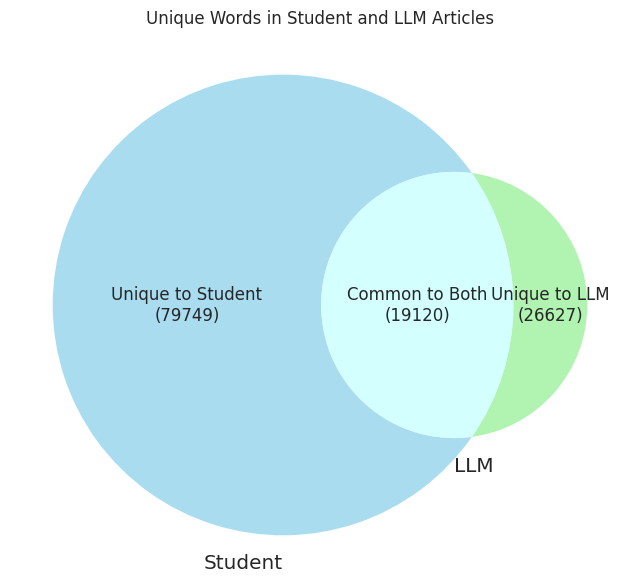

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

df['text'] = df['text'].str.replace('[^a-zA-Z]', ' ', regex=True)

student_data = df[df['label'] == 0]
llm_data = df[df['label'] == 1]

student_unique_words = set(' '.join(student_data['text']).split())
llm_unique_words = set(' '.join(llm_data['text']).split())

venn_labels = {'100': f'Unique to Student\n({len(student_unique_words)})',
               '010': f'Unique to LLM\n({len(llm_unique_words)})',
               '110': f'Common to Both\n({len(student_unique_words.intersection(llm_unique_words))})'}

plt.figure(figsize=(8, 8))
venn = venn2(subsets=[student_unique_words, llm_unique_words],
             set_labels=('Student', 'LLM'),
             set_colors=('skyblue', 'lightgreen'),
             alpha=0.7)

for text, position in zip(venn_labels.values(), ['100', '010', '110']):
    venn.get_label_by_id(position).set_text(text)

plt.title('Unique Words in Student and LLM Articles')
plt.show()


<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#5642C5;
       font-size:110%;
       font-family:Arial;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">    
Burada benzersiz kelime kullanımının öğrenciler tarafından daha fazla olduğunu görüyoruz.
    </p>
    
</div>



In [28]:

df['text'] = df['text'].str.replace('[^a-zA-Z]', ' ', regex=True)

student_data = df[df['label'] == 0]
llm_data = df[df['label'] == 1]

student_unique_words = set(' '.join(student_data['text']).split())
llm_unique_words = set(' '.join(llm_data['text']).split())

total_unique_words_student = len(student_unique_words)
total_unique_words_llm = len(llm_unique_words)

print("Number of unique words (student):", total_unique_words_student)
print("Number of unique words (LLM):", total_unique_words_llm)


Number of unique words (student): 79749
Number of unique words (LLM): 26627


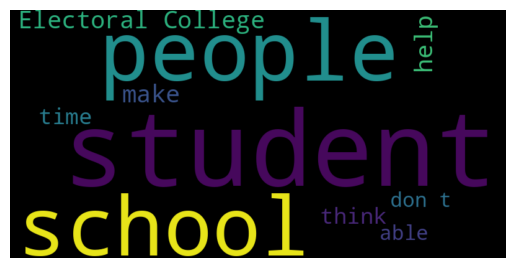

In [29]:
import pandas as pd
from wordcloud import WordCloud

# Extract the text column
texts = df['text']

# Combine the texts into a single string
text = ' '.join(texts)

# Create a WordCloud object
wc = WordCloud(width=800, height=400, max_words=10).generate(text)

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

We see a word cloud representing the most frequent words in the 'text' column. The size of words in the word cloud varies depending on their frequency in the text.

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#5642C5;
       font-size:110%;
       font-family:Arial;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">    
Burada en sık kullanılan kelimeleri temsil eden bir kelime bulutu görüyoruz. Kelime bulutundaki kelimelerin boyutu metindeki sıklıklarına bağlı olarak değişir.   
    </p>
    
</div>



# SUMMARY

* Student essays contain a fairly large number of unique words, resulting in more varied texts.

* It can be said that the use of punctuation marks is higher in the essays produced by LLM. 

* The number of words in the text, the number of unique words, the number of sentences in the text are less in the texts generated by LLM. The average word length in the text is higher.

* LLM-generated texts often have greater sentence lengths.


<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#5642C5;
       font-size:110%;
       font-family:Arial;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">    
ÖZET: 
        
* Öğrenci makaleleri, oldukça fazla sayıda benzersiz kelime içerir, bu da metinlerin daha çeşitli olmasına neden olur.
        
* LLM tarafından üretilen denemelerde noktalama işareti kullanımı daha fazla olabilir. 

* Metindeki kelime sayısı, benzersiz kelime sayısı, metindeki cümle sayısı LLM tarafından oluşturulan metinlerde daha azdır. Metindeki kelime uzunluğunun ortalaması ise daha fazladır.

* LLM tarafından üretilen metinlerde genellikle cümle uzunlukları daha fazladır. 
        
    </p>
    
</div>



Thank you!